### 1. 将sentiment_beta分层(分成不同策略)至groups，将每月每种策略的平均收益计算至returns

In [9]:
import numpy as np
import pandas as pd
sentiment_beta_table = pd.read_excel('beta_tables.xlsx',sheet_name = 'sentiment_beta_table',index_col = 0)
sentiment_beta_table

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688690.SH,688696.SH,688698.SH,688699.SH,688700.SH,688777.SH,688788.SH,688819.SH,688981.SH,689009.SH
2015-01,0.000780,0.004163,-0.004919,-0.004926,-0.001958,-0.007774,-0.006945,0.003995,-0.001417,-0.001747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02,-0.000542,0.000610,-0.000649,-0.005221,-0.001935,-0.002792,-0.002230,0.000847,-0.002064,-0.001601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03,-0.001216,-0.000082,-0.000616,-0.007165,-0.001688,-0.002465,-0.002904,0.001596,-0.000611,-0.001109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04,-0.000813,-0.000556,-0.000080,-0.009609,-0.000127,0.000324,-0.003202,0.001068,0.001138,0.000145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05,-0.000687,-0.000972,-0.000381,-0.009623,0.000644,0.000085,-0.003630,0.001435,0.001138,-0.000449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,-0.001524,-0.001476,-0.001838,-0.001090,-0.001434,0.000002,-0.001030,-0.001676,0.003004,0.000755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,0.000809,-0.000570,-0.002163,-0.000725,-0.002952,0.000889,-0.000382,-0.002081,0.001900,-0.001376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10,0.001065,-0.000035,-0.001298,-0.000051,-0.002073,0.000768,0.000255,-0.002493,0.000466,-0.001532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11,0.001062,-0.000256,-0.001259,-0.000466,-0.002016,0.000083,-0.000026,-0.002756,0.001031,-0.002142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
monthly_returns = pd.read_excel('monthly_returns.xlsx',index_col = 0)
monthly_returns

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688690.SH,688696.SH,688698.SH,688699.SH,688700.SH,688777.SH,688788.SH,688819.SH,688981.SH,689009.SH
2015-01,-0.120581,-0.056115,0.114322,0.000000,-0.078014,-0.009589,0.153010,0.009266,0.000000,-0.068136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02,0.004307,-0.028201,0.078963,0.000000,0.010769,-0.088520,0.016097,0.159908,0.000000,0.008602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03,0.125804,0.083922,0.280983,0.000000,0.339422,0.452959,0.505410,0.101583,0.000000,0.280384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04,0.283270,0.056440,0.056297,0.000000,0.327273,0.378590,0.000000,0.340120,0.000000,0.218152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05,-0.082635,-0.017123,0.334781,2.858537,0.335616,0.104924,0.000000,-0.096515,1.358108,0.230349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.130435,0.053598,-0.108089,0.006849,-0.228261,0.055814,0.003289,-0.083702,0.139759,-0.225720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.188906,NaN
2020-09,0.005968,0.027503,-0.097342,-0.122449,0.006260,0.035242,-0.055738,-0.084967,-0.173362,-0.114527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.255399,NaN
2020-10,0.170073,-0.016774,0.152014,-0.019380,-0.110420,-0.057447,-0.065972,0.080000,0.005115,-0.216685,...,NaN,NaN,NaN,NaN,NaN,NaN,0.786967,NaN,0.253575,1.513200
2020-11,0.156580,0.121448,0.038346,0.019763,0.001748,0.071106,0.011152,-0.015873,0.063613,-0.012152,...,NaN,NaN,NaN,NaN,NaN,2.470473,0.207663,NaN,-0.048040,0.498950


**Pause Here**

**Pause Here**

**Pause Here**

In [3]:
df_ = pd.DataFrame(sentiment_beta_table.iloc[0,:])
index_ = list(df_.index[np.where(np.isnan(df_))[0]])
df_ = df_.drop(index = index_)
cls = pd.qcut(df_[df_.columns[0]],q = 4)
cls_ = list(np.sort(pd.DataFrame(pd.value_counts(cls)).index))
cls_ = [str(i) for i in cls_]
cls_

['(-0.0733, -0.00503]',
 '(-0.00503, -0.00304]',
 '(-0.00304, -0.00111]',
 '(-0.00111, 0.0691]']

In [4]:
#根据字典进行映射
dis = {cls_[0]:'low',
       cls_[1]:'mid-low',
       cls_[2]:'mid-high',
       cls_[3]:'high'}
dis

{'(-0.0733, -0.00503]': 'low',
 '(-0.00503, -0.00304]': 'mid-low',
 '(-0.00304, -0.00111]': 'mid-high',
 '(-0.00111, 0.0691]': 'high'}

In [5]:
df_['等频划分'] = cls
df_['等频划分'] = df_['等频划分'].map(lambda x:str(x))
df_['sensitivity'] = df_['等频划分'].map(dis)
df_

,2015-01,等频划分,sensitivity
000001.SZ,0.000780,"(-0.00111, 0.0691]",high
000002.SZ,0.004163,"(-0.00111, 0.0691]",high
000004.SZ,-0.004919,"(-0.00503, -0.00304]",mid-low
000005.SZ,-0.004926,"(-0.00503, -0.00304]",mid-low
000006.SZ,-0.001958,"(-0.00304, -0.00111]",mid-high
...,...,...,...
603018.SH,-0.021794,"(-0.0733, -0.00503]",low
603019.SH,-0.056773,"(-0.0733, -0.00503]",low
603100.SH,0.000504,"(-0.00111, 0.0691]",high
603111.SH,-0.015449,"(-0.0733, -0.00503]",low


In [6]:
df_2015_01 = pd.DataFrame(index = range(len(R_it.columns)),columns = [(df_.columns[0] + ' ' + i) for i in dis.values()])
len_list = []
for i in range(4):
    name = list(dis.values())[i]
    item = list(df_[df_['sensitivity'] == name].index)
    df_2015_01.iloc[:len(item),i] = item
    len_list += [len(item)]
df_2015_01 = df_2015_01.iloc[:max(len_list),:]
df_2015_01

,2015-01 low,2015-01 mid-low,2015-01 mid-high,2015-01 high
0,000007.SZ,000004.SZ,000006.SZ,000001.SZ
1,000008.SZ,000005.SZ,000010.SZ,000002.SZ
2,000014.SZ,000016.SZ,000011.SZ,000009.SZ
3,000017.SZ,000032.SZ,000012.SZ,000035.SZ
4,000019.SZ,000036.SZ,000023.SZ,000040.SZ
...,...,...,...,...
601,603011.SH,601800.SH,601958.SH,601939.SH
602,603018.SH,601918.SH,601965.SH,601988.SH
603,603019.SH,601919.SH,603002.SH,601998.SH
604,603111.SH,601928.SH,603008.SH,603001.SH


In [15]:
R_it_slice = R_it['2015-01']
cols_res = []
for col in range(len(df_2015_01.columns)):
    in_col_res = []
    for row in range(len(df_2015_01.index)):
        stock = df_2015_01.iloc[row,col]
        if str(stock) == 'nan':
            pass
        else:
            in_col_res += [(np.cumprod(1 + R_it_slice.loc[:,stock]) - 1)[-1]]
    cols_res += [np.mean(in_col_res)]
cols_res

[0.09876345578774684,
 0.060794233944949885,
 0.056493712562615366,
 0.04514437844591878]

In [14]:
(np.cumprod(1 + R_it_slice.loc[:,'000007.SZ']) - 1)[-1]

-0.013308600380787294

**Resume Here: 将以上代码改写为循环体或函数**

**Resume Here: 将以上代码改写为循环体或函数**

**Resume Here: 将以上代码改写为循环体或函数**

In [10]:
yyyymm = list(sentiment_beta_table.index)
yyyymm

['2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

In [11]:
values = ['low','mid-low','mid-high','high']
groups_cols = []
for i in yyyymm:
    for j in values:
        groups_cols += [i + ' ' + j]
groups_cols

['2015-01 low',
 '2015-01 mid-low',
 '2015-01 mid-high',
 '2015-01 high',
 '2015-02 low',
 '2015-02 mid-low',
 '2015-02 mid-high',
 '2015-02 high',
 '2015-03 low',
 '2015-03 mid-low',
 '2015-03 mid-high',
 '2015-03 high',
 '2015-04 low',
 '2015-04 mid-low',
 '2015-04 mid-high',
 '2015-04 high',
 '2015-05 low',
 '2015-05 mid-low',
 '2015-05 mid-high',
 '2015-05 high',
 '2015-06 low',
 '2015-06 mid-low',
 '2015-06 mid-high',
 '2015-06 high',
 '2015-07 low',
 '2015-07 mid-low',
 '2015-07 mid-high',
 '2015-07 high',
 '2015-08 low',
 '2015-08 mid-low',
 '2015-08 mid-high',
 '2015-08 high',
 '2015-09 low',
 '2015-09 mid-low',
 '2015-09 mid-high',
 '2015-09 high',
 '2015-10 low',
 '2015-10 mid-low',
 '2015-10 mid-high',
 '2015-10 high',
 '2015-11 low',
 '2015-11 mid-low',
 '2015-11 mid-high',
 '2015-11 high',
 '2015-12 low',
 '2015-12 mid-low',
 '2015-12 mid-high',
 '2015-12 high',
 '2016-01 low',
 '2016-01 mid-low',
 '2016-01 mid-high',
 '2016-01 high',
 '2016-02 low',
 '2016-02 mid-low',
 '

In [12]:
groups = pd.DataFrame(index = range(1094),columns = groups_cols)
returns = pd.DataFrame(index = yyyymm,columns = values)

In [14]:
def fill_groups_returns(i):
    '''"i" passes an integer in range(len(sentiment_beta_table.index))'''
    month = yyyymm[i]
    # 将该月股票按sentiment_beta分层，得到从低到高的等频区间
    df_ = pd.DataFrame(sentiment_beta_table.iloc[i,:])
    index_ = list(df_.index[np.where(np.isnan(df_))[0]])
    df_ = df_.drop(index = index_)
    cls = pd.qcut(df_[month],q = 4)
    cls_ = list(np.sort(pd.DataFrame(pd.value_counts(cls)).index))
    cls_ = [str(j) for j in cls_]
    # 用字典映射 等频区间-标签
    dis = {cls_[0]:'low',
           cls_[1]:'mid-low',
           cls_[2]:'mid-high',
           cls_[3]:'high'}
    # 为该月每支股票打上标签
    df_['等频划分'] = cls
    df_['等频划分'] = df_['等频划分'].map(lambda x:str(x))
    df_['sensitivity'] = df_['等频划分'].map(dis)
    # 填充groups
    for m in range(4):
        tag = list(dis.values())[m]
        item = list(df_[df_['sensitivity'] == tag].index)
        groups.iloc[:len(item),int(m+4*i)] = item
    # 填充returns
    monthly_returns_slice = monthly_returns.loc[month,:]
    groups_slice = groups[[month + ' ' + n for n in dis.values()]]
    cols_res = []
    for col in range(len(groups_slice.columns)):
        in_col_res = []
        for row in range(len(groups_slice.index)):
            stock = groups_slice.iloc[row,col]
            if str(stock) == 'nan':
                pass
            else:
                in_col_res += [monthly_returns_slice[stock]]
        cols_res += [np.mean(in_col_res)]
    returns.loc[month,:] = cols_res

for p in range(len(yyyymm)):
    fill_groups_returns(p)

In [15]:
# 将groups和returns保存至excel
writer = pd.ExcelWriter('groups and returns.xlsx')
groups.to_excel(writer,'groups')
returns.to_excel(writer,'returns')
writer.save()

In [16]:
# 打开excel发现index = 992为groups的最后一行
groups = pd.read_excel('groups and returns.xlsx',sheet_name = 'groups',index_col = 0)
groups = groups.iloc[:993,:]
groups

,2015-01 low,2015-01 mid-low,2015-01 mid-high,2015-01 high,2015-02 low,2015-02 mid-low,2015-02 mid-high,2015-02 high,2015-03 low,2015-03 mid-low,...,2020-10 mid-high,2020-10 high,2020-11 low,2020-11 mid-low,2020-11 mid-high,2020-11 high,2020-12 low,2020-12 mid-low,2020-12 mid-high,2020-12 high
0,000007.SZ,000004.SZ,000006.SZ,000001.SZ,000005.SZ,000001.SZ,000012.SZ,000002.SZ,000001.SZ,000002.SZ,...,000001.SZ,000021.SZ,000004.SZ,000002.SZ,000001.SZ,000021.SZ,000006.SZ,000004.SZ,000002.SZ,000001.SZ
1,000008.SZ,000005.SZ,000010.SZ,000002.SZ,000006.SZ,000004.SZ,000017.SZ,000009.SZ,000005.SZ,000004.SZ,...,000007.SZ,000025.SZ,000006.SZ,000005.SZ,000010.SZ,000025.SZ,000009.SZ,000005.SZ,000007.SZ,000021.SZ
2,000014.SZ,000016.SZ,000011.SZ,000009.SZ,000007.SZ,000019.SZ,000026.SZ,000016.SZ,000006.SZ,000010.SZ,...,000010.SZ,000039.SZ,000009.SZ,000007.SZ,000019.SZ,000028.SZ,000011.SZ,000012.SZ,000008.SZ,000025.SZ
3,000017.SZ,000032.SZ,000012.SZ,000035.SZ,000008.SZ,000025.SZ,000028.SZ,000021.SZ,000007.SZ,000012.SZ,...,000019.SZ,000040.SZ,000011.SZ,000008.SZ,000023.SZ,000039.SZ,000014.SZ,000016.SZ,000010.SZ,000039.SZ
4,000019.SZ,000036.SZ,000023.SZ,000040.SZ,000010.SZ,000027.SZ,000030.SZ,000023.SZ,000008.SZ,000019.SZ,...,000023.SZ,000048.SZ,000014.SZ,000012.SZ,000031.SZ,000040.SZ,000020.SZ,000017.SZ,000019.SZ,000040.SZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688556.SH,688081.SH,688368.SH,688580.SH
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688561.SH,688180.SH,688396.SH,688589.SH
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688569.SH,688378.SH,688567.SH,688598.SH
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688585.SH,688513.SH,688596.SH,688599.SH


In [17]:
returns = pd.read_excel('groups and returns.xlsx',sheet_name = 'returns',index_col = 0)
returns

,low,mid-low,mid-high,high
2015-01,0.108078,0.068676,0.064912,0.054517
2015-02,0.059892,0.075766,0.072073,0.096330
2015-03,0.209203,0.211237,0.227252,0.236594
2015-04,0.207891,0.168039,0.153704,0.169851
2015-05,0.318995,0.248656,0.251337,0.256170
...,...,...,...,...
2020-08,0.034112,0.037653,0.034425,0.028863
2020-09,-0.071967,-0.064005,-0.058884,-0.079222
2020-10,-0.005885,0.001924,0.003854,0.011157
2020-11,0.031050,0.041115,0.032179,0.011048


### 2. 累计收益率

In [1]:
import numpy as np
import pandas as pd
# 打开excel发现index = 992为groups的最后一行
groups = pd.read_excel('groups and returns.xlsx',sheet_name = 'groups',index_col = 0)
groups = groups.iloc[:993,:]
groups

,2015-01 low,2015-01 mid-low,2015-01 mid-high,2015-01 high,2015-02 low,2015-02 mid-low,2015-02 mid-high,2015-02 high,2015-03 low,2015-03 mid-low,...,2020-10 mid-high,2020-10 high,2020-11 low,2020-11 mid-low,2020-11 mid-high,2020-11 high,2020-12 low,2020-12 mid-low,2020-12 mid-high,2020-12 high
0,000007.SZ,000004.SZ,000006.SZ,000001.SZ,000005.SZ,000001.SZ,000012.SZ,000002.SZ,000001.SZ,000002.SZ,...,000001.SZ,000021.SZ,000004.SZ,000002.SZ,000001.SZ,000021.SZ,000006.SZ,000004.SZ,000002.SZ,000001.SZ
1,000008.SZ,000005.SZ,000010.SZ,000002.SZ,000006.SZ,000004.SZ,000017.SZ,000009.SZ,000005.SZ,000004.SZ,...,000007.SZ,000025.SZ,000006.SZ,000005.SZ,000010.SZ,000025.SZ,000009.SZ,000005.SZ,000007.SZ,000021.SZ
2,000014.SZ,000016.SZ,000011.SZ,000009.SZ,000007.SZ,000019.SZ,000026.SZ,000016.SZ,000006.SZ,000010.SZ,...,000010.SZ,000039.SZ,000009.SZ,000007.SZ,000019.SZ,000028.SZ,000011.SZ,000012.SZ,000008.SZ,000025.SZ
3,000017.SZ,000032.SZ,000012.SZ,000035.SZ,000008.SZ,000025.SZ,000028.SZ,000021.SZ,000007.SZ,000012.SZ,...,000019.SZ,000040.SZ,000011.SZ,000008.SZ,000023.SZ,000039.SZ,000014.SZ,000016.SZ,000010.SZ,000039.SZ
4,000019.SZ,000036.SZ,000023.SZ,000040.SZ,000010.SZ,000027.SZ,000030.SZ,000023.SZ,000008.SZ,000019.SZ,...,000023.SZ,000048.SZ,000014.SZ,000012.SZ,000031.SZ,000040.SZ,000020.SZ,000017.SZ,000019.SZ,000040.SZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688556.SH,688081.SH,688368.SH,688580.SH
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688561.SH,688180.SH,688396.SH,688589.SH
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688569.SH,688378.SH,688567.SH,688598.SH
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,688585.SH,688513.SH,688596.SH,688599.SH


In [2]:
returns = pd.read_excel('groups and returns.xlsx',sheet_name = 'returns',index_col = 0)
returns

,low,mid-low,mid-high,high
2015-01,0.108078,0.068676,0.064912,0.054517
2015-02,0.059892,0.075766,0.072073,0.096330
2015-03,0.209203,0.211237,0.227252,0.236594
2015-04,0.207891,0.168039,0.153704,0.169851
2015-05,0.318995,0.248656,0.251337,0.256170
...,...,...,...,...
2020-08,0.034112,0.037653,0.034425,0.028863
2020-09,-0.071967,-0.064005,-0.058884,-0.079222
2020-10,-0.005885,0.001924,0.003854,0.011157
2020-11,0.031050,0.041115,0.032179,0.011048


**计算累计收益率**

In [3]:
cum_returns = pd.DataFrame(index = returns.index,columns = returns.columns)
for i in range(4):
    cum_returns.iloc[:,i] = np.cumprod(1 + returns.iloc[:,i]) - 1
cum_returns

,low,mid-low,mid-high,high
2015-01,0.108078,0.068676,0.064912,0.054517
2015-02,0.174443,0.149646,0.141664,0.156098
2015-03,0.420140,0.392493,0.401109,0.429624
2015-04,0.715374,0.626487,0.616466,0.672446
2015-05,1.262570,1.030923,1.022744,1.100877
...,...,...,...,...
2020-08,0.895382,0.818982,0.754905,0.474703
2020-09,0.758977,0.702558,0.651569,0.357874
2020-10,0.748626,0.705835,0.657933,0.373024
2020-11,0.802920,0.775970,0.711284,0.388193


**计算沪深300逐月的累计收益**

In [5]:
HS300 = pd.read_excel('指标.xlsx',sheet_name = '沪深300',index_col = 0)
HS300 = pd.DataFrame(HS300)
HS300 = HS300['2014-12-31':'2020']
HS300['Date'] = HS300.index
HS300.index = range(0,len(HS300))
HS300

,000300.SH,Date
0,3533.7050,2014-12-31
1,3641.5410,2015-01-05
2,3641.0590,2015-01-06
3,3643.7900,2015-01-07
4,3559.2590,2015-01-08
...,...,...
1458,5042.0137,2020-12-25
1459,5064.4147,2020-12-28
1460,5042.9361,2020-12-29
1461,5113.7105,2020-12-30


In [6]:
HS300_ = pd.DataFrame()
HS300_['Date'] = HS300.Date[1:]
HS300_['R_mkt'] = np.diff(np.log(HS300['000300.SH']))
HS300_.set_index('Date',inplace = True)
HS300_

,R_mkt
Date,
2015-01-05,0.030060
2015-01-06,-0.000132
2015-01-07,0.000750
2015-01-08,-0.023472
2015-01-09,-0.003528
...,...
2020-12-25,0.008365
2020-12-28,0.004433
2020-12-29,-0.004250


In [10]:
months = list(sentiment_beta_table.index)
HS300_month_r = pd.DataFrame(index = months,columns = ['R_mkt'])

for i in range(len(months)):
    HS300_month_r.iloc[i,:] = (np.cumprod(1 + HS300_[months[i]]) - 1).iloc[-1,:]

HS300_month_r

,R_mkt
2015-01,-0.0339229
2015-02,0.0387097
2015-03,0.131317
2015-04,0.169394
2015-05,0.0129409
...,...
2020-08,0.0244788
2020-09,-0.048753
2020-10,0.0224769
2020-11,0.0554989


In [11]:
HS300_month_cumr = np.cumprod(1 + HS300_month_r) - 1
HS300_month_cumr

,R_mkt
2015-01,-0.0339229
2015-02,0.00347363
2015-03,0.135246
2015-04,0.32755
2015-05,0.34473
...,...
2020-08,0.149565
2020-09,0.09352
2020-10,0.118099
2020-11,0.180152


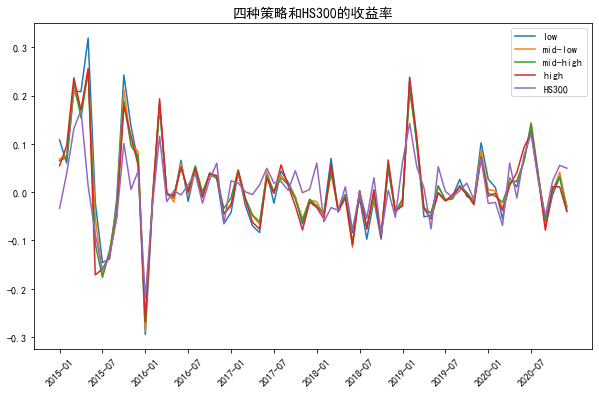

In [12]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
seq = list(range(0,72,6))

fig = plt.figure(figsize=(10,6))
for col in returns.columns:
    plt.plot(returns[col],label = col)
plt.plot(HS300_month_r,label = 'HS300')
plt.legend(loc='best')
plt.xticks([cum_returns.index[i] for i in seq],rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('四种策略和HS300的收益率',fontsize=14)
plt.show()

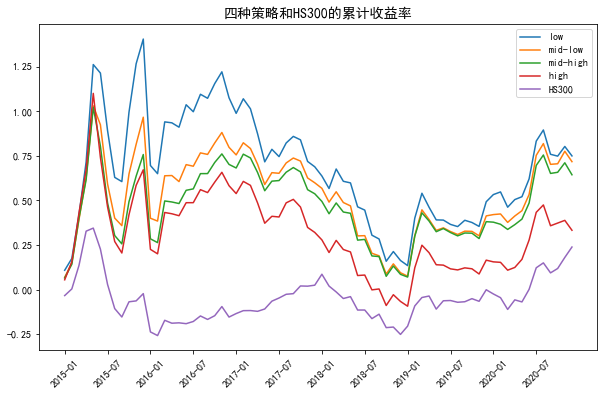

In [13]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
seq = list(range(0,72,6))

fig = plt.figure(figsize=(10,6))
for col in cum_returns.columns:
    plt.plot(cum_returns[col],label = col)
plt.plot(HS300_month_cumr,label = 'HS300')
plt.legend(loc='best')
plt.xticks([cum_returns.index[i] for i in seq],rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('四种策略和HS300的累计收益率',fontsize=14)
plt.show()

### 3. 四种策略从2015-01到2020-12最频繁出现的股票

**low, mid-low, mid-high, high的股票频数从高到低排列**

In [14]:
stocks_low = pd.concat([groups.iloc[:,0+4*k] for k in range(72)],axis = 0) # 取消dropna并设置axis = 1，能可视化每月该class的成分股
stocks_low.dropna(inplace = True)
stocks_low

0      000007.SZ
1      000008.SZ
2      000014.SZ
3      000017.SZ
4      000019.SZ
         ...    
988    688556.SH
989    688561.SH
990    688569.SH
991    688585.SH
992    688586.SH
Length: 56315, dtype: object

In [15]:
stocks_midlow = pd.concat([groups.iloc[:,1+4*k] for k in range(72)],axis = 0)
stocks_midlow.dropna(inplace = True)
stocks_midlow

0      000004.SZ
1      000005.SZ
2      000016.SZ
3      000032.SZ
4      000036.SZ
         ...    
988    688081.SH
989    688180.SH
990    688378.SH
991    688513.SH
992    688558.SH
Length: 56282, dtype: object

In [16]:
stocks_midhigh = pd.concat([groups.iloc[:,2+4*k] for k in range(72)],axis = 0)
stocks_midhigh.dropna(inplace = True)
stocks_midhigh

0      000006.SZ
1      000010.SZ
2      000011.SZ
3      000012.SZ
4      000023.SZ
         ...    
987    688277.SH
988    688368.SH
989    688396.SH
990    688567.SH
991    688596.SH
Length: 56263, dtype: object

In [17]:
stocks_high = pd.concat([groups.iloc[:,3+4*k] for k in range(72)],axis = 0)
stocks_high.dropna(inplace = True)
stocks_high

0      000001.SZ
1      000002.SZ
2      000009.SZ
3      000035.SZ
4      000040.SZ
         ...    
988    688580.SH
989    688589.SH
990    688598.SH
991    688599.SH
992    688600.SH
Length: 56299, dtype: object

In [18]:
cols = ['low','midlow','midhigh','high']
stock_freq = pd.DataFrame(index = range(50),columns = cols)
for i in range(4):
    col = locals()['stocks_' + cols[i]]
    stock_freq.iloc[:,i] = col.value_counts()[:50].index

stock_freq

,low,midlow,midhigh,high
0,300209.SZ,600219.SH,002433.SZ,002760.SZ
1,000584.SZ,600497.SH,002521.SZ,002667.SZ
2,002683.SZ,002472.SZ,002403.SZ,300169.SZ
3,600556.SH,600637.SH,000521.SZ,600081.SH
4,603799.SH,601218.SH,002254.SZ,002424.SZ
5,300073.SZ,600077.SH,002469.SZ,300268.SZ
6,000571.SZ,000525.SZ,600444.SH,603033.SH
7,601788.SH,000965.SZ,002672.SZ,600616.SH
8,002662.SZ,002206.SZ,002541.SZ,300175.SZ
9,300252.SZ,600358.SH,002561.SZ,600455.SH


In [20]:
stock_freq_melt = pd.melt(stock_freq,value_vars = stock_freq.columns,var_name = 'class',value_name = 'stocks') 
                                    #index不用分类，所以id_vars不用设置
                                    #如果不用定义var_name和value_name,这种情况直接pd.melt(stock_freq)
stock_freq_melt
# 将stock_freq_melt存入excel
stock_freq_melt.to_excel('stock_freq_melt.xlsx',index = True)

In [21]:
# 在excel用choice插入规模、组织形式、行业后，重新读取
stock_freq_melt = pd.read_excel('stock_freq_melt.xlsx',index_col = 0)
stock_freq_melt.dropna(inplace = True)
stock_freq_melt['规模代码'] = stock_freq_melt['规模'].map(lambda x: x[0])
stock_freq_melt['组织形式代码'] = stock_freq_melt['组织形式'].map(lambda x: x[:4])
stock_freq_melt

,class,stocks,规模代码,组织形式代码,行业代码,规模,组织形式,行业
0,low,300209.SZ,大,民营企业,F,大型企业,民营企业,批发和零售业
1,low,000584.SZ,中,民营企业,C,中型企业,民营企业,制造业
2,low,002683.SZ,大,地方国有,B,大型企业,地方国有企业,采矿业
3,low,600556.SH,中,民营企业,I,中型企业,民营企业,信息传输、软件和信息技术服务业
4,low,603799.SH,大,民营企业,C,大型企业,民营企业,制造业
...,...,...,...,...,...,...,...,...
195,high,600626.SH,大,地方国有,C,大型企业,地方国有企业,制造业
196,high,600598.SH,大,中央国有,A,大型企业,中央国有企业,农、林、牧、渔业
197,high,000668.SZ,中,民营企业,K,中型企业,民营企业,房地产业
198,high,002697.SZ,大,民营企业,F,大型企业,民营企业,批发和零售业


In [22]:
low = stock_freq_melt[stock_freq_melt['class'] == 'low']
midlow = stock_freq_melt[stock_freq_melt['class'] == 'midlow']
midhigh = stock_freq_melt[stock_freq_melt['class'] == 'midhigh']
high = stock_freq_melt[stock_freq_melt['class'] == 'high']

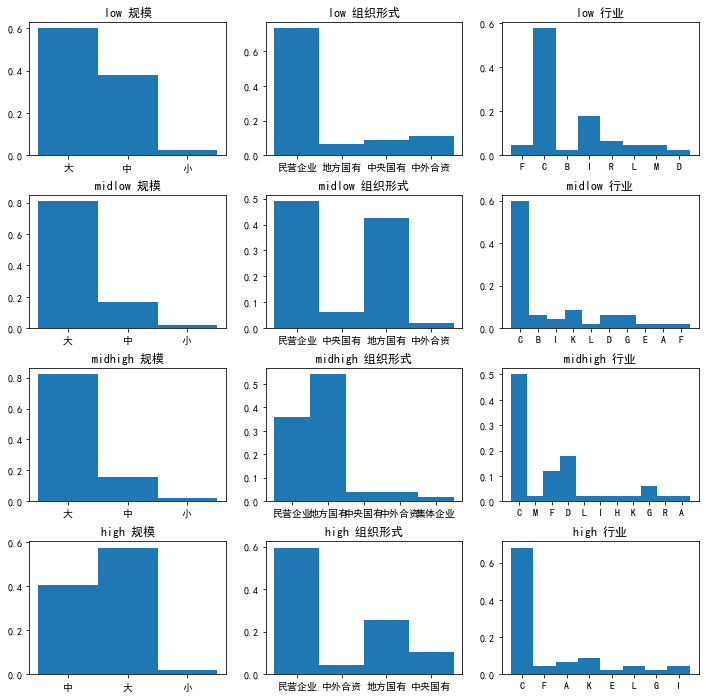

In [31]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize = (12,12))
for i in range(2,5):
    axe = fig.add_subplot(4,3,i-1)
    axe.hist(low.iloc[:,i],bins = np.arange(len(set(low.iloc[:,i])) + 1) - 0.5,density = True)
    plt.title(low.iloc[0,0] + ' ' + low.columns[i][:-2])
for i in range(2,5):
    axe = fig.add_subplot(4,3,i+2)
    axe.hist(midlow.iloc[:,i],bins = np.arange(len(set(midlow.iloc[:,i])) + 1) - 0.5,density = True)
    plt.title(midlow.iloc[0,0] + ' ' + midlow.columns[i][:-2])
for i in range(2,5):
    axe = fig.add_subplot(4,3,i+5)
    axe.hist(midhigh.iloc[:,i],bins = np.arange(len(set(midhigh.iloc[:,i])) + 1) - 0.5,density = True)
    plt.title(midhigh.iloc[0,0] + ' ' + midhigh.columns[i][:-2])
for i in range(2,5):
    axe = fig.add_subplot(4,3,i+8)
    axe.hist(high.iloc[:,i],bins = np.arange(len(set(high.iloc[:,i])) + 1) - 0.5,density = True)
    plt.title(high.iloc[0,0] + ' ' + high.columns[i][:-2])
plt.subplots_adjust(hspace = 0.3)
plt.show()